In [1]:
import sys
import os
import itertools
sys.path.append(os.path.abspath(".."))

from extract_ingest.ingest import Ingestor

In [2]:
from analyze.basic_data_inspection import DataInspector, DataSummaryInspectionStrategy, DataTypeInspectionStrategy
from analyze.missing_value import SimpleMisssingValueAnalysis
from analyze.univariate_analysis import UnivariateAnalyzer
from analyze.bivariate_analysis import BivariateAnalyzer

In [16]:
ingest = Ingestor()
df = ingest.ingest("C:\projects\ml_learn\EToE\data_extracted\car_data.csv")
df.drop(columns="User ID", inplace=True)
df

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ratho\AppData\Local\Temp\ipykernel_4664\3463208811.py:2: SyntaxWarning: invalid escape sequence '\p'
  df = ingest.ingest("C:\projects\ml_learn\EToE\data_extracted\car_data.csv")


,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
...,...,...,...,...
995,Male,38,59000,0
996,Female,47,23500,0
997,Female,28,138500,1
998,Female,48,134000,1


In [17]:
inspect = DataInspector(DataTypeInspectionStrategy())

inspect.execute_strategy(df)


Data type and not null count
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        1000 non-null   object
 1   Age           1000 non-null   int64 
 2   AnnualSalary  1000 non-null   int64 
 3   Purchased     1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB
None


In [18]:
inspect.setStrategy(DataSummaryInspectionStrategy())
inspect.execute_strategy(df)


Data Summary (Numeric Feature)
               Age   AnnualSalary    Purchased
count  1000.000000    1000.000000  1000.000000
mean     40.106000   72689.000000     0.402000
std      10.707073   34488.341867     0.490547
min      18.000000   15000.000000     0.000000
25%      32.000000   46375.000000     0.000000
50%      40.000000   72000.000000     0.000000
75%      48.000000   90000.000000     1.000000
max      63.000000  152500.000000     1.000000

Data Summary (Categorical Feature)
        Gender
count     1000
unique       2
top     Female
freq       516



Missing Value count by Column
Series([], dtype: int64)

 Visualizing Missing Value


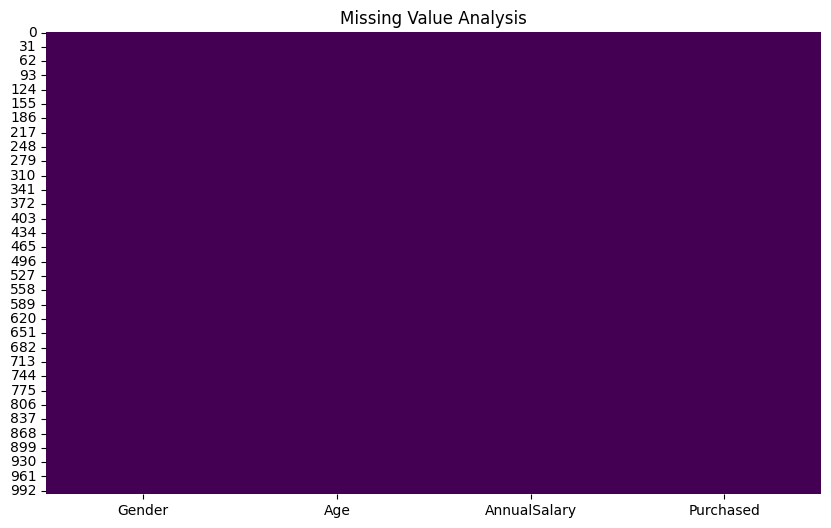

In [19]:
missing_value_analysis = SimpleMisssingValueAnalysis()
missing_value_analysis.analyze(df)

'Age' is a numerical feature.


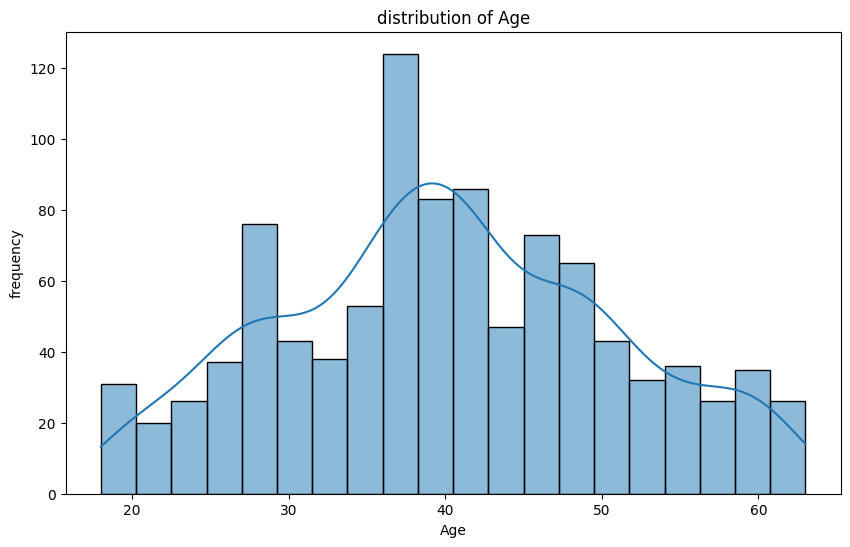

'AnnualSalary' is a numerical feature.


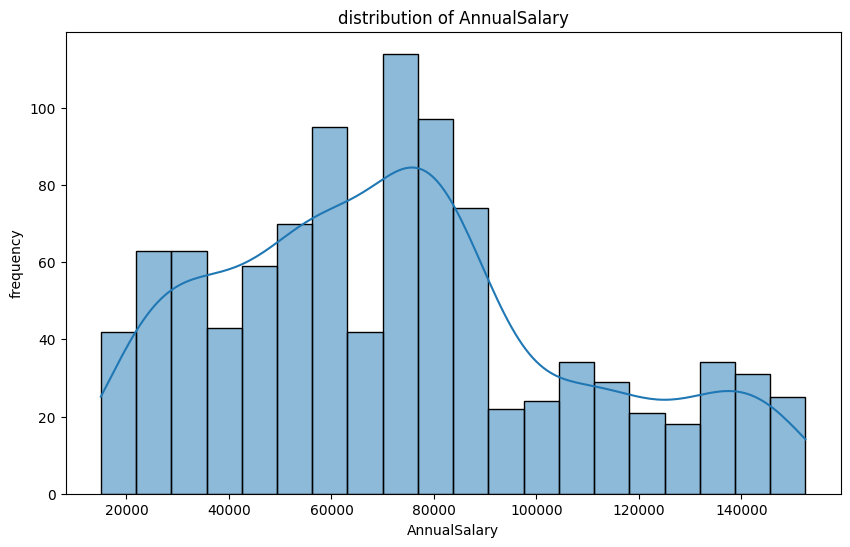

In [20]:
univariate_analyzer = UnivariateAnalyzer()

for feature in ["Age", "AnnualSalary"]:
    univariate_analyzer.execute_strategy(df, feature)

Analyzing pair: (Gender, Age)
'Gender is a numerical feature and 'Age is a categorical feature


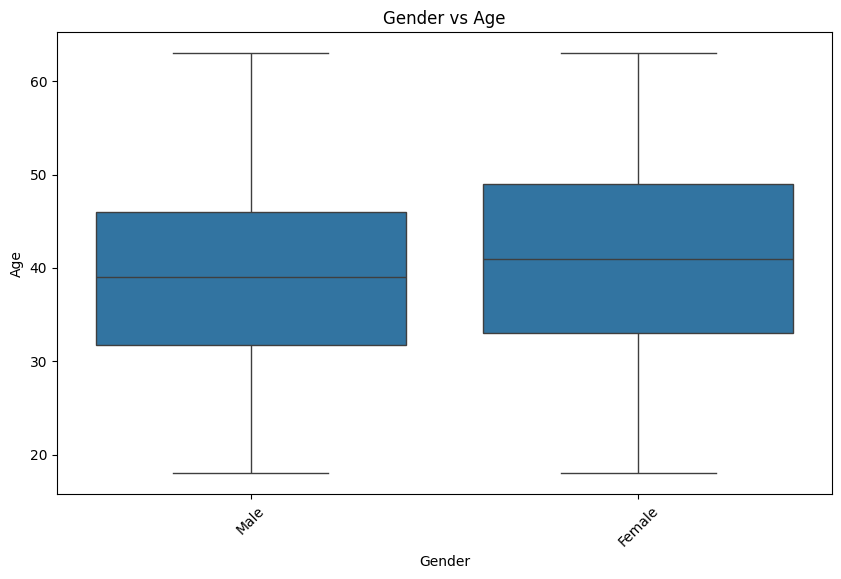

Analyzing pair: (Gender, AnnualSalary)
'Gender is a numerical feature and 'AnnualSalary is a categorical feature


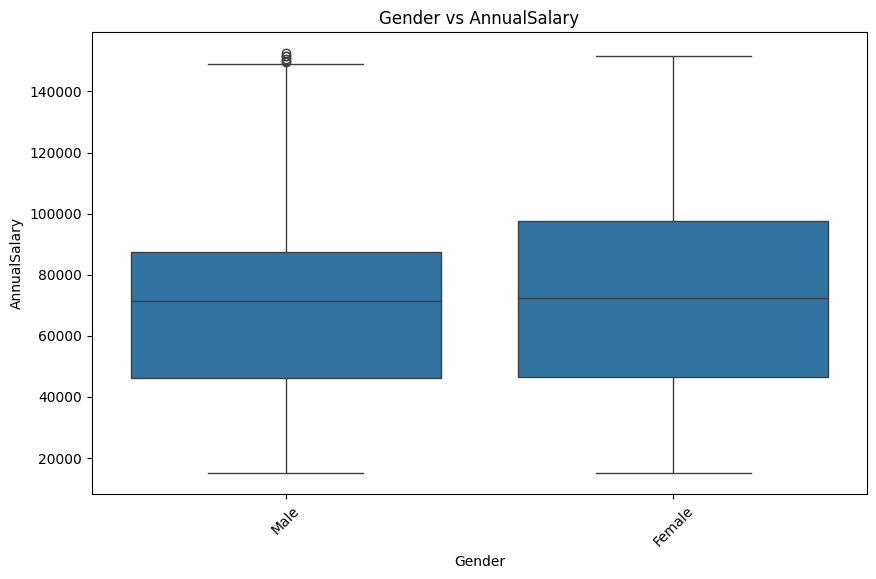

Analyzing pair: (Gender, Purchased)
'Gender is a numerical feature and 'Purchased is a categorical feature


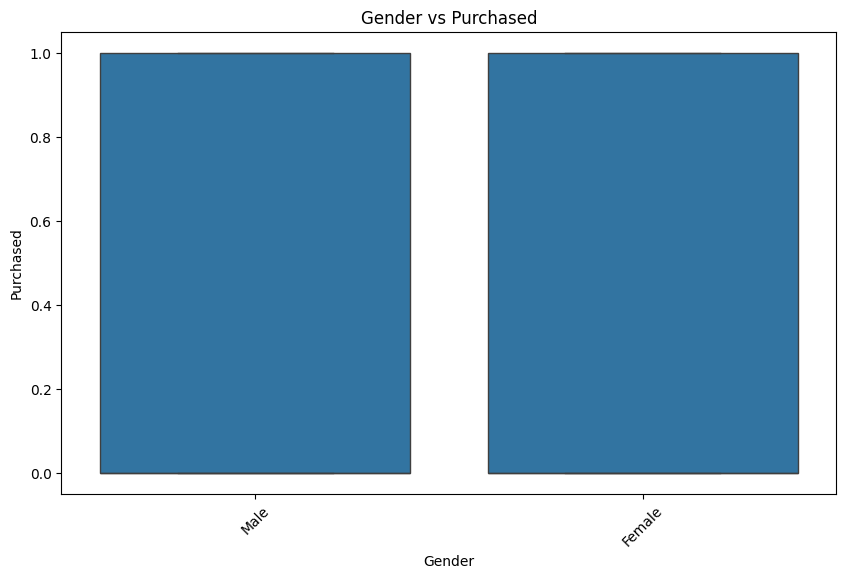

Analyzing pair: (Age, AnnualSalary)
'Age' and 'AnnualSalary' are a numerical feature.


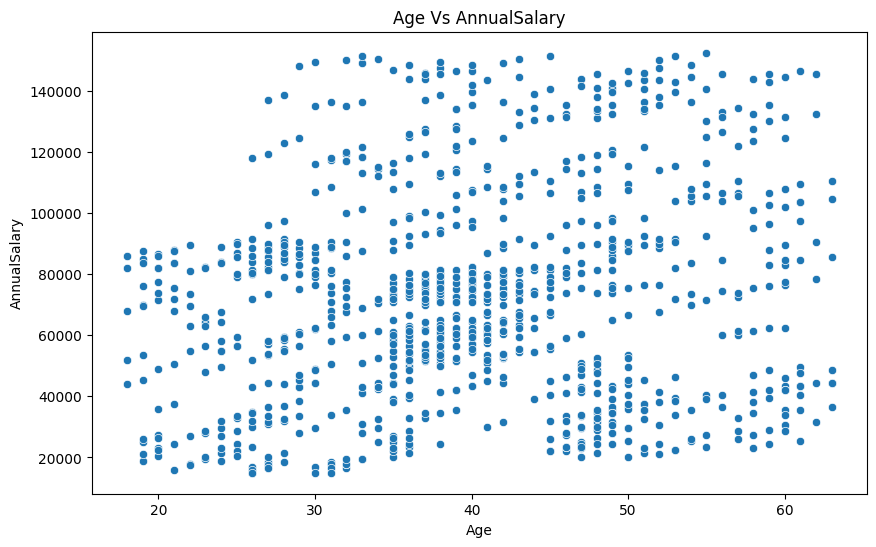

Analyzing pair: (Age, Purchased)
'Age' and 'Purchased' are a numerical feature.


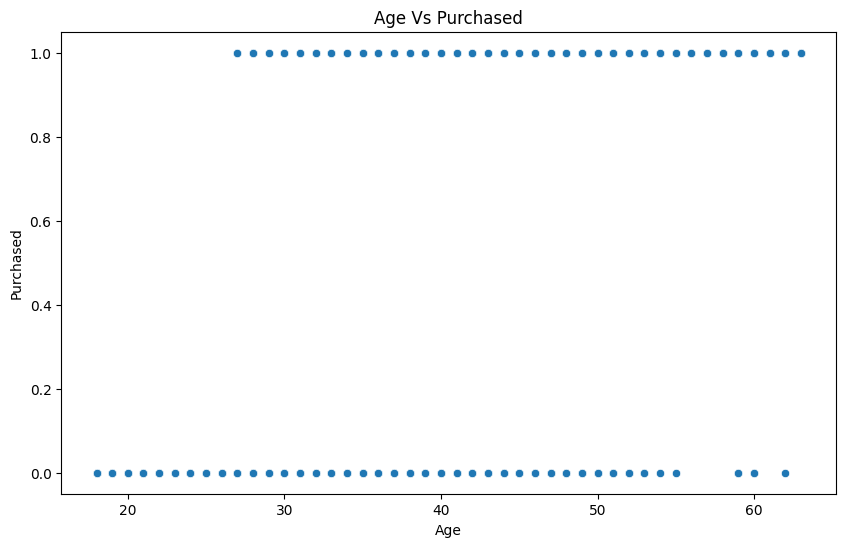

Analyzing pair: (AnnualSalary, Purchased)
'AnnualSalary' and 'Purchased' are a numerical feature.


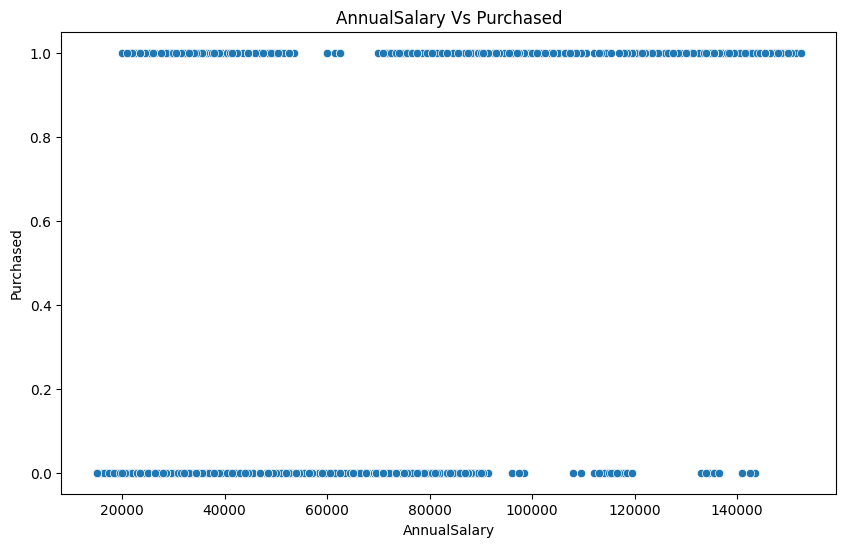

In [21]:
bivariate_analyzer = BivariateAnalyzer()

combination = [["Gender", "AnnualSalary"], ["Age", "AnnualSalary"], ["Age", "Purchased"], ["AnnualSalary", "Purchased"]]

for feature1, feature2 in itertools.combinations(df.columns, 2):
    print(f"Analyzing pair: ({feature1}, {feature2})")
    bivariate_analyzer.execute_strategy(df, feature1, feature2)